<a href="https://colab.research.google.com/github/sutejym122/Data-Science-and-Machine-Learning-/blob/main/Task12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 12

SUTEJ Y M

GO_STP_10487

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
data = pd.DataFrame(digits.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
print(data.shape)
print(data.size)
print(data.describe())
print(data.dtypes)

(1797, 64)
115008
           0            1            2   ...           61           62           63
count  1797.0  1797.000000  1797.000000  ...  1797.000000  1797.000000  1797.000000
mean      0.0     0.303840     5.204786  ...     6.764051     2.067891     0.364496
std       0.0     0.907192     4.754826  ...     5.900623     4.090548     1.860122
min       0.0     0.000000     0.000000  ...     0.000000     0.000000     0.000000
25%       0.0     0.000000     1.000000  ...     0.000000     0.000000     0.000000
50%       0.0     0.000000     4.000000  ...     6.000000     0.000000     0.000000
75%       0.0     0.000000     9.000000  ...    12.000000     2.000000     0.000000
max       0.0     8.000000    16.000000  ...    16.000000    16.000000    16.000000

[8 rows x 64 columns]
0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
59    float64
60    float64
61    float64
62    float64
63    float64
Length: 64, dtype: object


In [ ]:
data['target'] = digits.target
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
data.target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop(['target'],axis='columns')
y=data.target
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=12)
print(len(xtrain))
print(len(ytrain))

1437
1437


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
model_rbf=SVC(kernel='rbf',random_state=0, probability=True)
model_rbf.fit(xtrain,ytrain)
ypred_1=model_rbf.predict(xtest)
print("Model Score of Kernal(rbf) :", model_rbf.score(xtest,ytest))

Model Score of Kernal(rbf) : 0.9916666666666667


In [ ]:
model_linear=SVC(kernel='linear',random_state=0, probability=True)
model_linear.fit(xtrain,ytrain)
ypred_2=model_linear.predict(xtest)
print("Model Score of Kernal(linear) :", model_linear.score(xtest,ytest))

Model Score of Kernal(linear) : 0.975


In [ ]:
model_poly=SVC(kernel='poly',random_state=0, probability=True)
model_poly.fit(xtrain,ytrain)
ypred_3=model_poly.predict(xtest)
print("Model Score of Kernal(poly) :", model_poly.score(xtest,ytest))

Model Score of Kernal(poly) : 0.9944444444444445


In [ ]:
from sklearn.metrics import confusion_matrix,mean_squared_error

In [ ]:
c1 = confusion_matrix(ytest,ypred_1)
c2 = confusion_matrix(ytest,ypred_2)
c3 = confusion_matrix(ytest,ypred_3)

In [ ]:
print('Confusion matrix of Kernal(rbf) : ')
print(c1)
print('Confusion matrix of Kernal(linear) : ')
print(c2)
print('Confusion matrix of Kernal(poly) : ')
print(c3)

Confusion matrix of Kernal(rbf) : 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  1]
 [ 0  0  0  0  0 32  0  0  0  2]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  0 34]]
Confusion matrix of Kernal(linear) : 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  1]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  1  0 31  0  0  0  2]
 [ 0  0  0  0  1  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  2  1  0  0  0  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  0 33]]
Confusion matrix of Kernal(poly) : 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  2]
 [ 0  0  0  0  0  0 29  0  0  0

In [ ]:
mse1=mean_squared_error(ytest,ypred_1)
mse2=mean_squared_error(ytest,ypred_2)
mse3=mean_squared_error(ytest,ypred_3)
print('MSE of Kernal(rbf) : ',mse1)
print('MSE of Kernal(linear) : ',mse2)
print('MSE of Kernal(poly) : ',mse3)
accuracy = accuracy_score(ytest,ypred_1)

MSE of Kernal(rbf) :  0.15833333333333333
MSE of Kernal(linear) :  0.6833333333333333
MSE of Kernal(poly) :  0.08888888888888889


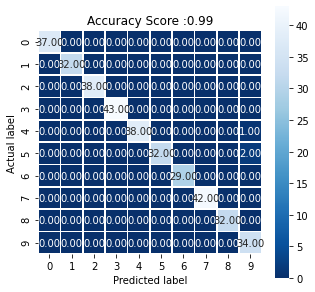

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(c1, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
A=f'Accuracy Score :{accuracy:.2f}'
plt.title(A)
plt.show()
